### Instructions: Have all the code for all the questions in one Jupyter notebook and upload
the file at the time of submission. I will only consider these this file format for grading.
So, after you uploaded the file, check the file extension and if it is not an ipynb,
then upload the right file.


Way to present:
### Solution 1 to indicate solution to question 1. Please submit original work.

 

For this assignment, use the population.csv file, which is in the files section of the class portal. The column headings are not there, so you have to give names to the columns.

Perform the following:

1) Give column headings. Use this list of names to accomplish this task

"age", "emp_type", "number", "education", "ed_num",
"marital_status", "occupation", "relationship",
"race", "gender", "capital_gain","capital_loss","hours_per_week",
"native_country", "income"

The y variable is income. The cut off value for the income is $50,000. We want to know how age, employment type, education, marital status etc. influence income.

2) Print the names of the columns.

3) Print the number of rows and columns.

4) Change string categorical variables to numbers.

5) Check if there are any NaN values. If yes, replace them with appropriate value or values.

6) Run SVM and Logistic Regression and compute accuracy for each model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.utils import class_weight

### Question 1: Give column headings. Use this list of names to accomplish this task

In [2]:
### The dataset is using ' ?' as Nulls, so while importing I am replacing them as NaN.

In [3]:
col_names = ["age", "emp_type", "number", "education", "ed_num", \
"marital_status", "occupation", "relationship", \
"race", "gender", "capital_gain","capital_loss","hours_per_week", \
"native_country", "income"]
df =  pd.read_csv("population.csv", delimiter=',', names=col_names, header=None, date_parser = 'python', keep_default_na = True, na_values = [' ?'])
print(df.head())

   age           emp_type  number   education  ed_num       marital_status  \
0   39          State-gov   77516   Bachelors      13        Never-married   
1   50   Self-emp-not-inc   83311   Bachelors      13   Married-civ-spouse   
2   38            Private  215646     HS-grad       9             Divorced   
3   53            Private  234721        11th       7   Married-civ-spouse   
4   28            Private  338409   Bachelors      13   Married-civ-spouse   

           occupation    relationship    race   gender  capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital_loss  hours_per_week  native_country  income  
0             0              40   United

In [4]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

### Question 2: Print the names of the columns.

In [5]:
print(df.columns)

Index(['age', 'emp_type', 'number', 'education', 'ed_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')


### Question 3: Print the number of rows and columns.

In [6]:
xdim, ydim = df.shape
print('Number of Rows:-', xdim)
print('Number of Columns:-', ydim)

Number of Rows:- 32561
Number of Columns:- 15


### Question 4: Change string categorical variables to numbers.
### Question 5: Check if there are any NaN values. If yes, replace them with appropriate value or values.

In [7]:
### Since I am using Multilabel Encoder, I am replacing nulls with Unspecified.

In [8]:
print(df.head())
#From below information seems like following columns are catogerical. lets verify
# emp_type, education, marital_status, occupation, relationship, race, gender, native_country, income

   age           emp_type  number   education  ed_num       marital_status  \
0   39          State-gov   77516   Bachelors      13        Never-married   
1   50   Self-emp-not-inc   83311   Bachelors      13   Married-civ-spouse   
2   38            Private  215646     HS-grad       9             Divorced   
3   53            Private  234721        11th       7   Married-civ-spouse   
4   28            Private  338409   Bachelors      13   Married-civ-spouse   

           occupation    relationship    race   gender  capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital_loss  hours_per_week  native_country  income  
0             0              40   United

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
emp_type          30725 non-null object
number            32561 non-null int64
education         32561 non-null object
ed_num            32561 non-null int64
marital_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [10]:
df['income'].isna().sum()

0

In [11]:
# emp_type, education, marital_status, occupation, relationship, race, gender, native_country, income

In [12]:
print(df['emp_type'].value_counts())
print("Number of Nulls", df['emp_type'].isna().sum())
print(df[df['emp_type'].isna()])
#whenever emplouyment type is missig, occuption is missing too
df['emp_type'] = df['emp_type'].replace(np.nan, 'Unspecified')
print(df[df['emp_type'].isna()])

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: emp_type, dtype: int64
Number of Nulls 1836
       age emp_type  number      education  ed_num          marital_status  \
27      54      NaN  180211   Some-college      10      Married-civ-spouse   
61      32      NaN  293936        7th-8th       4   Married-spouse-absent   
69      25      NaN  200681   Some-college      10           Never-married   
77      67      NaN  212759           10th       6      Married-civ-spouse   
106     17      NaN  304873           10th       6           Never-married   
...    ...      ...     ...            ...     ...                     ...   
32530   35      NaN  320084      Bachelors      13      Married-civ-spouse   
32531   30      NaN   33811      Bachelors      13           Never-married   
32539   71      NaN  287372     

In [13]:
df['education'].value_counts()
print("Number of Nulls", df['education'].isna().sum())

Number of Nulls 0


In [14]:
df['marital_status'].value_counts()
print("Number of Nulls", df['marital_status'].isna().sum())

Number of Nulls 0


In [15]:
df['occupation'].value_counts()
print("Number of Nulls", df['occupation'].isna().sum())
print(df[df['occupation'].isna()])
#whenever emplouyment type is missig, occuption is missing too
df['occupation'] = df['occupation'].replace(np.nan, 'Unspecified')
print(df[df['occupation'].isna()])

Number of Nulls 1843
       age     emp_type  number      education  ed_num  \
27      54  Unspecified  180211   Some-college      10   
61      32  Unspecified  293936        7th-8th       4   
69      25  Unspecified  200681   Some-college      10   
77      67  Unspecified  212759           10th       6   
106     17  Unspecified  304873           10th       6   
...    ...          ...     ...            ...     ...   
32530   35  Unspecified  320084      Bachelors      13   
32531   30  Unspecified   33811      Bachelors      13   
32539   71  Unspecified  287372      Doctorate      16   
32541   41  Unspecified  202822        HS-grad       9   
32542   72  Unspecified  129912        HS-grad       9   

               marital_status occupation    relationship                 race  \
27         Married-civ-spouse        NaN         Husband   Asian-Pac-Islander   
61      Married-spouse-absent        NaN   Not-in-family                White   
69              Never-married        Na

In [16]:
df['relationship'].value_counts()
print("Number of Nulls", df['relationship'].isna().sum())

Number of Nulls 0


In [17]:
df['race'].value_counts()
print("Number of Nulls", df['race'].isna().sum())

Number of Nulls 0


In [18]:
df['gender'].value_counts()
print("Number of Nulls", df['gender'].isna().sum())

Number of Nulls 0


In [19]:
df['native_country'].value_counts()
print("Number of Nulls", df['native_country'].isna().sum())
print(df[df['native_country'].isna()])
df['native_country'] = df['native_country'].replace(np.nan, 'Unspecified')
print(df[df['native_country'].isna()])

Number of Nulls 583
       age           emp_type  number      education  ed_num  \
14      40            Private  121772      Assoc-voc      11   
38      31            Private   84154   Some-college      10   
51      18            Private  226956        HS-grad       9   
61      32        Unspecified  293936        7th-8th       4   
93      30            Private  117747        HS-grad       9   
...    ...                ...     ...            ...     ...   
32449   44       Self-emp-inc   71556        Masters      14   
32469   58       Self-emp-inc  181974      Doctorate      16   
32492   42   Self-emp-not-inc  217597        HS-grad       9   
32510   39            Private  107302        HS-grad       9   
32525   81        Unspecified  120478      Assoc-voc      11   

               marital_status       occupation    relationship  \
14         Married-civ-spouse     Craft-repair         Husband   
38         Married-civ-spouse            Sales         Husband   
51           

In [20]:
df['income'].value_counts()
print("Number of Nulls", df['income'].isna().sum())


Number of Nulls 0


In [21]:
df.isnull().values.any()

False

In [22]:
from sklearn import preprocessing 
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [23]:
print(df.head())

   age  emp_type  number  education  ed_num  marital_status  occupation  \
0   22         6    2671          9      12               4           0   
1   33         5    2926          9      12               2           3   
2   21         3   14086         11       8               0           5   
3   36         3   15336          1       6               2           5   
4   11         3   19355          9      12               2           9   

   relationship  race  gender  capital_gain  capital_loss  hours_per_week  \
0             1     4       1            25             0              39   
1             0     4       1             0             0              12   
2             1     4       1             0             0              39   
3             0     2       1             0             0              39   
4             5     2       0             0             0              39   

   native_country  income  
0              38       0  
1              38       0  
2 

In [24]:
df.isnull().values.any()

False

In [25]:
### Question 6: Run SVM and Logistic Regression and compute accuracy for each model.

In [26]:
df.columns

Index(['age', 'emp_type', 'number', 'education', 'ed_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [27]:
dfx = df[['age', 'emp_type', 'number', 'education', 'ed_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country']].copy(deep=True)
dfy = df[["income"]].copy(deep=True)

In [28]:
### Logistic regression

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
x = scaler.fit_transform(dfx)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size = 0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [32]:
print(y_train.shape)
y_train = np.array(y_train).flatten()
print(y_train.shape)

(26048, 1)
(26048,)


In [33]:
model.fit(x_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
ypred = model.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[4653,  289],
       [ 898,  673]])

In [36]:
from sklearn.metrics import accuracy_score
print("Base rate accuracy is: %0.2f" %(accuracy_score(y_test, ypred)))

Base rate accuracy is: 0.82


In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [38]:
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))

Logistic AUC = 0.68
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4942
           1       0.70      0.43      0.53      1571

    accuracy                           0.82      6513
   macro avg       0.77      0.68      0.71      6513
weighted avg       0.80      0.82      0.80      6513



In [39]:
from sklearn.metrics import roc_curve
b = model.predict_proba(x_test)[:,1]
print(b[0:5])
fpr, tpr, threshold = roc_curve(y_test, b)

[0.23369659 0.02501796 0.52097005 0.14234326 0.38592994]


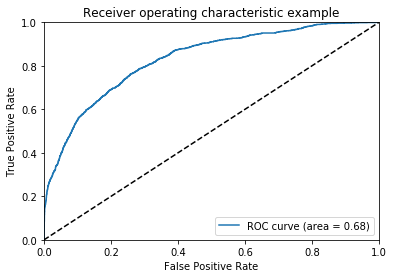

In [40]:
# plotting ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [41]:
#### SVM

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size = 0.20)

In [44]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', gamma = 'scale', class_weight='balanced', C=1.2, random_state=0)
svclassifier.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.2, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
y_pred = svclassifier.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3610 1358]
 [ 293 1252]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      4968
           1       0.48      0.81      0.60      1545

    accuracy                           0.75      6513
   macro avg       0.70      0.77      0.71      6513
weighted avg       0.82      0.75      0.76      6513



In [47]:
# polynomial kernel

from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8, gamma = 'scale', class_weight='balanced', C=1.2, random_state=0)
svclassifier.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.2, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [48]:
y_pred = svclassifier.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4685  283]
 [1249  296]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4968
           1       0.51      0.19      0.28      1545

    accuracy                           0.76      6513
   macro avg       0.65      0.57      0.57      6513
weighted avg       0.72      0.76      0.72      6513



In [50]:
# Guassian kernel

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', gamma = 'scale', class_weight='balanced', C=0.8, random_state=10)
svclassifier.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.8, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [51]:
y_pred = svclassifier.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2776 2192]
 [ 791  754]]
              precision    recall  f1-score   support

           0       0.78      0.56      0.65      4968
           1       0.26      0.49      0.34      1545

    accuracy                           0.54      6513
   macro avg       0.52      0.52      0.49      6513
weighted avg       0.65      0.54      0.58      6513



In [53]:
# sigmoid kernel

from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid', gamma = 'scale', class_weight='balanced', C=1.2, random_state=0)
svclassifier.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.2, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [54]:
y_pred = svclassifier.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2359 2609]
 [ 780  765]]
              precision    recall  f1-score   support

           0       0.75      0.47      0.58      4968
           1       0.23      0.50      0.31      1545

    accuracy                           0.48      6513
   macro avg       0.49      0.48      0.45      6513
weighted avg       0.63      0.48      0.52      6513

